In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

RMSE: 36879.51117306305
R2: 0.8050902737969227


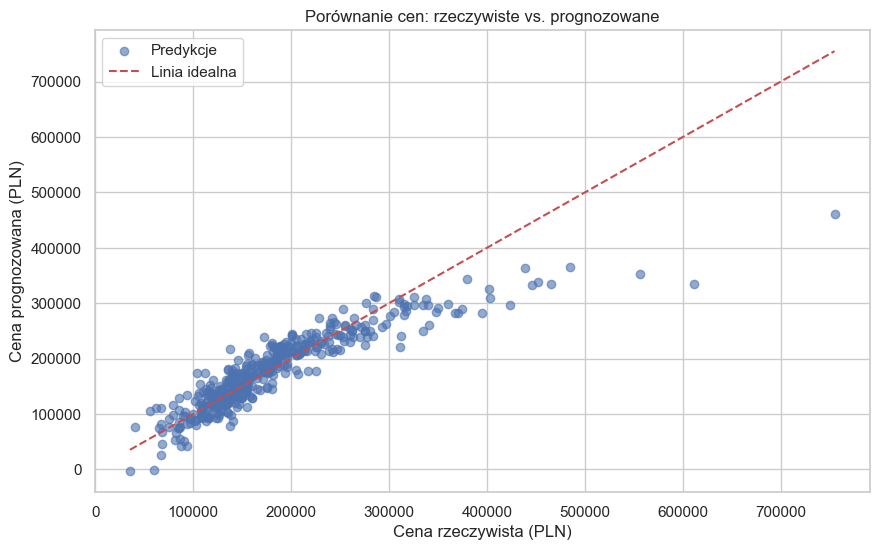

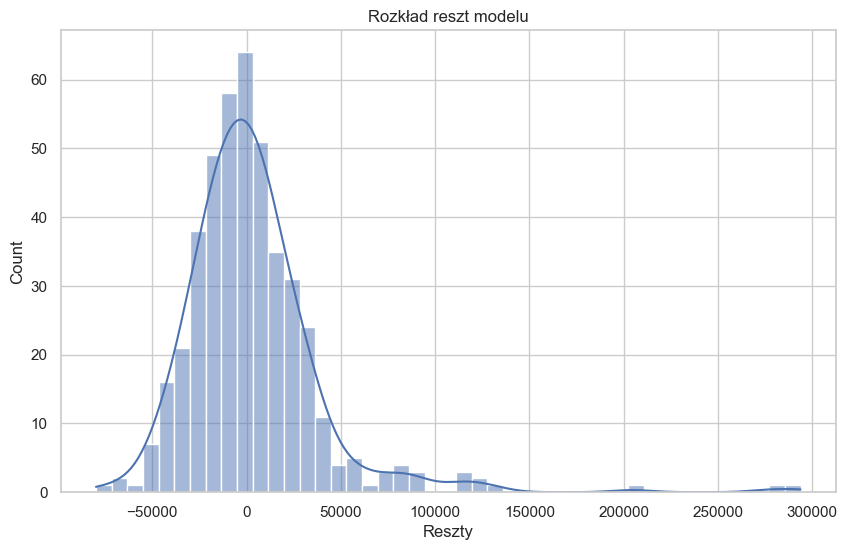

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Ustawienia wizualizacji
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

# Wczytanie danych – upewnij się, że nazwa kolumny indeksu odpowiada nagłówkowi (tutaj 'Id')
df = pd.read_csv('train.csv', index_col='Id')

# Przykładowo: wybranie cech, które chcemy wykorzystać do predykcji ceny (SalePrice)
# Możesz wybrać kolumny, które uważasz za istotne – poniżej przykładowy wybór cech numerycznych
cechy = ['LotArea', 'YearBuilt', 'OverallQual', 'OverallCond', 'TotalBsmtSF', 'GrLivArea']
target = 'SalePrice'

# Przygotowanie zbioru modelowego – usunięcie wierszy z brakami w wybranych kolumnach
df_model = df[cechy + [target]].dropna()

# Definicja zmiennych X (cechy) oraz y (target – cena)
X = df_model[cechy]
y = df_model[target].astype(float)

# Podział danych na zbiór treningowy (70%) i testowy (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Budowa modelu regresji liniowej
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print("RMSE:", rmse)
print("R2:", r2)

# Wizualizacja: Porównanie cen rzeczywistych vs. prognozowanych
plt.figure()
plt.scatter(y_test, y_pred, alpha=0.6, label="Predykcje")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label="Linia idealna")
plt.xlabel("Cena rzeczywista (PLN)")
plt.ylabel("Cena prognozowana (PLN)")
plt.title("Porównanie cen: rzeczywiste vs. prognozowane")
plt.legend()
plt.show()

# Wizualizacja: Rozkład reszt modelu
reszty = y_test - y_pred
plt.figure()
sns.histplot(reszty, kde=True)
plt.xlabel("Reszty")
plt.title("Rozkład reszt modelu")
plt.show()